In [11]:
import numpy as np
n = 2
h = 1 / 3
A = 1/(h**2) * np.array([[2, -1], [-1, 2]])
b = np . array ([1 ,1])
u_min = np . linalg . solve (A , b )
print ( f" Solution theorique pour n = 2 et b ={ b } : u * = { u_min } " )

 Solution theorique pour n = 2 et b =[1 1] : u * = [0.11111111 0.11111111] 


U_min = [-0.95078816  1.9609852 ] , r = 0.06280095701896717 , Max_iteration = 0
U_min = [-0.90292362  1.92321774] , r = 0.06097044361607266 , Max_iteration = 1
U_min = [-0.85636774  1.88665996] , r = 0.05919392621018228 , Max_iteration = 2
U_min = [-0.81108301  1.85127531] , r = 0.05746981826869253 , Max_iteration = 3
U_min = [-0.767033    1.81702834] , r = 0.05579657992029376 , Max_iteration = 4
U_min = [-0.72418236  1.78388463] , r = 0.05417271658219259 , Max_iteration = 5
U_min = [-0.68249675  1.7518108 ] , r = 0.05259677762767518 , Max_iteration = 6
U_min = [-0.64194284  1.72077445] , r = 0.05106735509282297 , Max_iteration = 7
U_min = [-0.60248827  1.69074414] , r = 0.0495830824212309 , Max_iteration = 8
U_min = [-0.56410164  1.66168937] , r = 0.04814263324560569 , Max_iteration = 9
U_min = [-0.52675243  1.63358056] , r = 0.04674472020516047 , Max_iteration = 10
U_min = [-0.49041104  1.60638897] , r = 0.04538809379775029 , Max_iteration = 11
U_min = [-0.45504871  1.58008676] , r =

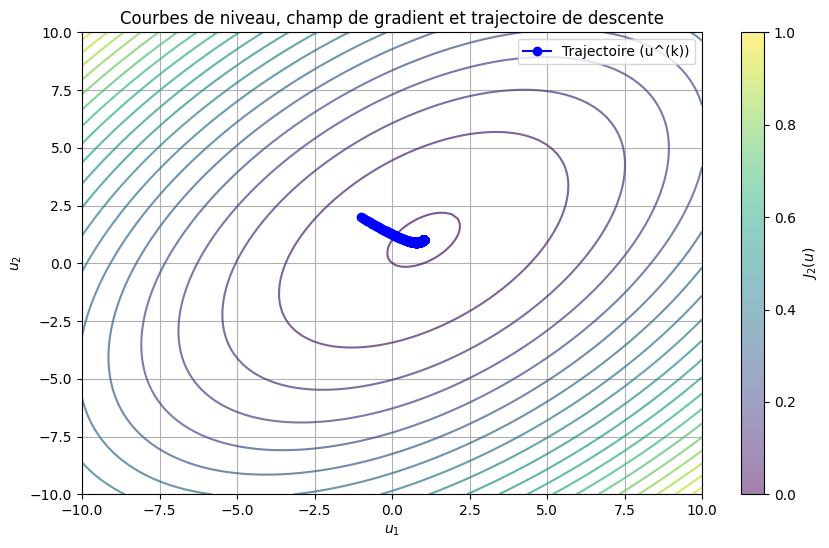

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

for n in [10,20,30, 50, 100]:
    h = 1/n+1
    A = 1/(h**2) * np.array([[2, -1], [-1, 2]]) # Matrice A
    b = np.array([1, 1]) 
    u0 = np.transpose(np.array([-1,2])) 
    rho = 0.01


def J2(u):
    return 0.5 * np.dot(u.T, np.dot(A , u)) - np.dot(b, u) 

def grad_J2(u,A,b):
    return np.dot(A,u) - b

def gradient_fixe(rho, u0) :
    
    
    max_iter = 1000
    
    r = Tol = 10**(-6)
    k = 0
    u = u0.copy()
    trajectory = [u.copy()]
    while r >= Tol and k <= max_iter :
        grad = grad_J2(u,A,b)
        direction  = -grad
        u_next = u + rho * direction
        trajectory.append(u_next.copy())
        r = np.linalg.norm(u_next-u)
        print (f'U_min = {u_next} , r = {r} , Max_iteration = {k}')
        k += 1
        u=u_next
    return np.array(trajectory)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
U1, U2 = np.meshgrid(x, y)
# Calculer les valeurs de J2 pour chaque point de la grille
Z = np.zeros_like(U1)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        Z[i, j] = J2(u)
# Calculer les gradients pour la grille
grad_U1, grad_U2 = np.zeros_like(U1), np.zeros_like(U2)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        grad = grad_J2(u,A,b)
        grad_U1[i, j], grad_U2[i, j] = grad[0], grad[1]

trajectory = gradient_fixe(rho, u0)
# Tracer les courbes de niveau
plt.figure(figsize=(10, 6))
plt.contour(U1, U2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.quiver(U1, U2, grad_U1, grad_U2, color="white", scale=200, alpha=0.5)
# Trajectoire
trajectory_u1, trajectory_u2 = trajectory[:, 0], trajectory[:, 1]
plt.plot(trajectory_u1, trajectory_u2, marker='o', color='blue', label="Trajectoire (u^(k))")
plt.title("Courbes de niveau, champ de gradient et trajectoire de descente")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.colorbar(label="$J_2(u)$")
plt.legend()
plt.grid()
plt.show()

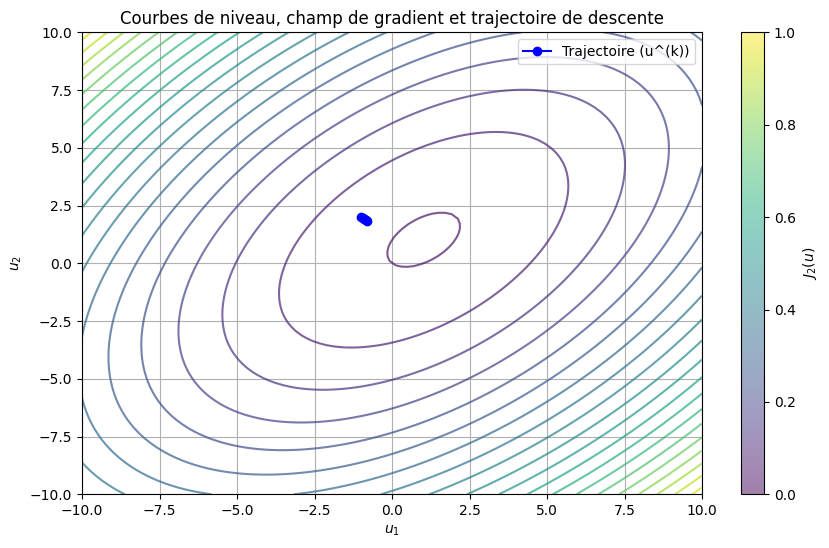

In [13]:
plt.figure(figsize=(10, 6))
plt.contour(U1, U2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.quiver(U1, U2, grad_U1, grad_U2, color="white", scale=200, alpha=0.5)
plt.plot(trajectory_u1[:5], trajectory_u2[:5], marker='o', color='blue', label="Trajectoire (u^(k))")
plt.title("Courbes de niveau, champ de gradient et trajectoire de descente")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.colorbar(label="$J_2(u)$")
plt.legend()
plt.grid()
plt.show()

U_min = [ 1.22 -0.64] , r = 3.449347764433154 , Max_iteration = 0
U_min = [-0.3832  0.77  ] , r = 2.1350293300093086 , Max_iteration = 1
U_min = [ 0.506456 -0.208528] , r = 1.3224994688543352 , Max_iteration = 2
U_min = [-0.0931216   0.35016848] , r = 0.8195334375034063 , Max_iteration = 3
U_min = [ 0.25654071 -0.01829914] , r = 0.507968618945635 , Max_iteration = 4
U_min = [0.02959521 0.19999591] , r = 0.3148920316705377 , Max_iteration = 5
U_min = [0.16563018 0.05998174] , r = 0.19521650095618015 , Max_iteration = 6
U_min = [0.07913972 0.14464176] , r = 0.12102857890411436 , Max_iteration = 7
U_min = [0.13177537 0.09116411] , r = 0.07503578998405633 , Max_iteration = 8
U_min = [0.09868659 0.12386557] , r = 0.04652153144963656 , Max_iteration = 9
U_min = [0.11899248 0.10338151] , r = 0.02884312481107548 , Max_iteration = 10
U_min = [0.10630662 0.11598542] , r = 0.017882660698666362 , Max_iteration = 11
U_min = [0.1141276  0.10812674] , r = 0.011087223461510634 , Max_iteration = 12
U_m

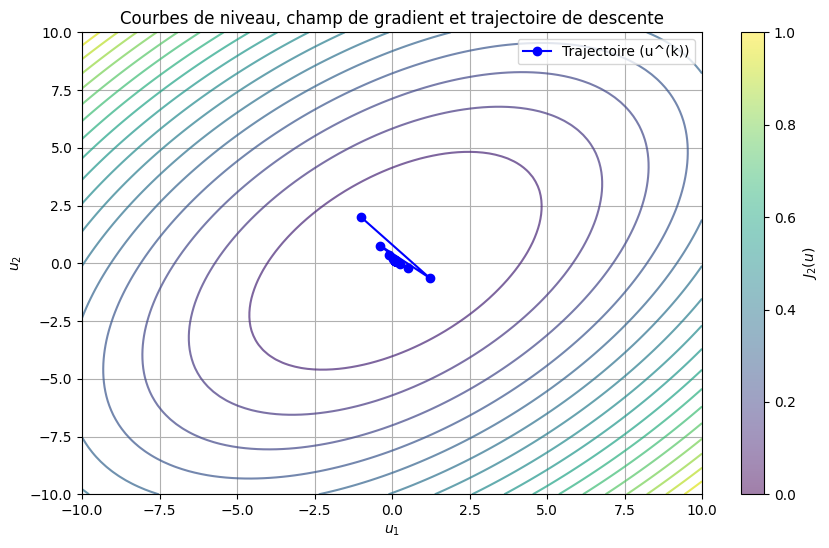

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
h = 1 / 3  # h pour n=2
A = 1/(h**2) * np.array([[2, -1], [-1, 2]]) # Matrice A
b = np.array([1, 1]) 
u0 = np.transpose(np.array([-1,2])) 
rho = 0.06


def J2(u):
    return 0.5 * np.dot(u.T, np.dot(A , u)) - np.dot(b, u) 

def grad_J2(u,A,b):
    return np.dot(A,u) - b

def gradient_fixe(rho, u0) :
    
    
    max_iter = 1000
    
    r = Tol = 10**(-6)
    k = 0
    u = u0.copy()
    trajectory = [u.copy()]
    while r >= Tol and k <= max_iter :
        grad = grad_J2(u,A,b)
        direction  = -grad
        u_next = u + rho * direction
        trajectory.append(u_next.copy())
        r = np.linalg.norm(u_next-u)
        print (f'U_min = {u_next} , r = {r} , Max_iteration = {k}')
        k += 1
        u=u_next
    return np.array(trajectory)

    
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
U1, U2 = np.meshgrid(x, y)
# Calculer les valeurs de J2 pour chaque point de la grille
Z = np.zeros_like(U1)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        Z[i, j] = J2(u)
# Calculer les gradients pour la grille
grad_U1, grad_U2 = np.zeros_like(U1), np.zeros_like(U2)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        grad = grad_J2(u,A,b)
        grad_U1[i, j], grad_U2[i, j] = grad[0], grad[1]

trajectory = gradient_fixe(rho, u0)

# Tracer les courbes de niveau
plt.figure(figsize=(10, 6))
plt.contour(U1, U2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.quiver(U1, U2, grad_U1, grad_U2, color="white", scale=200, alpha=0.5)

# Trajectoire
trajectory_u1, trajectory_u2 = trajectory[:, 0], trajectory[:, 1]
plt.plot(trajectory_u1, trajectory_u2, marker='o', color='blue', label="Trajectoire (u^(k))")

plt.title("Courbes de niveau, champ de gradient et trajectoire de descente")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.colorbar(label="$J_2(u)$")
plt.legend()
plt.grid()
plt.show()

U_min = [0.37717914 0.36227346] , r = 2.1398062091503904 , Max_iteration = 0 , rho = 0.03722105781065599
U_min = [0.10031393 0.12947143] , r = 0.361733503726492 , Max_iteration = 1 , rho = 0.10948640270304703
U_min = [0.11369833 0.11355346] , r = 0.020797207456018575 , Max_iteration = 2 , rho = 0.03722105781065599
U_min = [0.11100615 0.11128954] , r = 0.0035175513696221357 , Max_iteration = 3 , rho = 0.10948814205884183
U_min = [0.11113624 0.11113483] , r = 0.00020213545838452027 , Max_iteration = 4 , rho = 0.03722105781065599
U_min = [0.11111009 0.11111284] , r = 3.416911240070243e-05 , Max_iteration = 5 , rho = 0.1094906876503864
U_min = [0.11111135 0.11111134] , r = 1.9647093063315974e-06 , Max_iteration = 6 , rho = 0.03722176139485461
U_min = [0.1111111  0.11111113] , r = 3.320179675735074e-07 , Max_iteration = 7 , rho = 0.10969583907332604


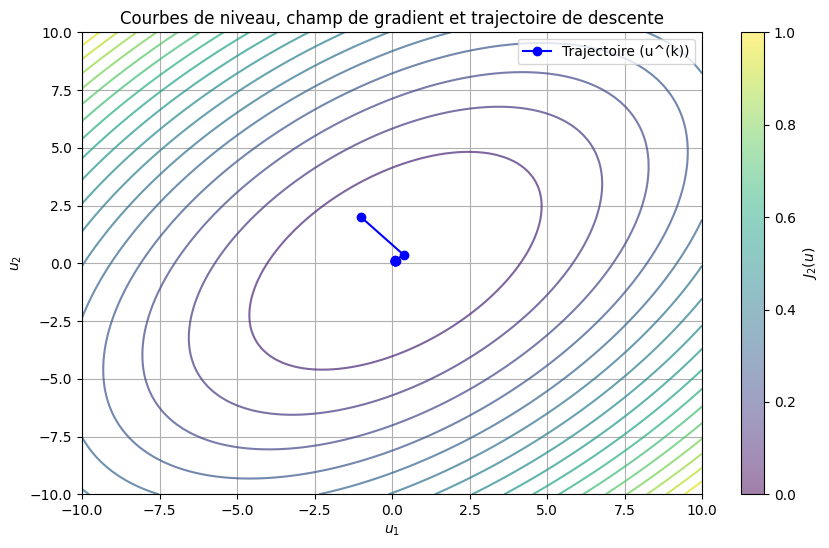

In [15]:
from math import *
import numpy as np
import matplotlib.pyplot as plt 
h = 1 / 3  # h pour n=2
A = 1/(h**2) * np.array([[2, -1], [-1, 2]]) # Matrice A
b = np.array([1, 1]) 
u0 = np.transpose(np.array([-1,2])) 
def J2(u):
    return 0.5 * np.dot(u.T, np.dot(A , u)) - np.dot(b, u) 
# calculer gradiant
def grad_J2(u,A,b):
    return np.dot(A,u) - b
# la fonction section doreé
def section_dorée(u,direction,a,b):
    err = b - a 
    Tol = 10**-6
    phi = (1+sqrt(5))/2
    k=0
    while err >= Tol :
        a_next = a + (b-a)/(phi**2)
        b_next = a + (b-a)/phi
        J2_a_next = J2(u+a_next*direction)
        J2_b_next = J2(u+b_next*direction)
        if J2_a_next>J2_b_next :
            a=a_next 
        elif J2_a_next< J2_b_next :
           b=b_next 
        else :
           b=b_next 
           a=a_next
        k += 1
        err = b - a
    rho_min = (a+b)/2
    return rho_min

def gradient_optimale(u0):
    max_iteration = 1000
    k = 0
    r = Tol = 10**(-6)
    u = u0.copy()
    trajectory = [u.copy()]
    while r >= Tol and k <= max_iteration:
        grad = grad_J2(u,A,b)
        direction  = -grad
        a = 0
        bb = 1
        rho = section_dorée(u,direction,a,bb)
        u_next = u + rho*direction
        trajectory.append(u_next.copy())
        r= np.linalg.norm(u_next-u)
        print (f'U_min = {u_next} , r = {r} , Max_iteration = {k} , rho = {rho}' )
        u = u_next
        k += 1
    return np.array(trajectory)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
U1, U2 = np.meshgrid(x, y)
Z = np.zeros_like(U1)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        Z[i, j] = J2(u)
# Calculer les gradients pour la grille
grad_U1, grad_U2 = np.zeros_like(U1), np.zeros_like(U2)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        grad = grad_J2(u,A,b)
        grad_U1[i, j], grad_U2[i, j] = grad[0], grad[1]
trajectory = gradient_optimale(u0)

# Tracer les courbes de niveau
plt.figure(figsize=(10, 6))
plt.contour(U1, U2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.quiver(U1, U2, grad_U1, grad_U2, color="white", scale=200, alpha=0.5)

# Trajectoire
trajectory_u1, trajectory_u2 = trajectory[:, 0], trajectory[:, 1]
plt.plot(trajectory_u1[:], trajectory_u2[:], marker='o', color='blue', label="Trajectoire (u^(k))")

plt.title("Courbes de niveau, champ de gradient et trajectoire de descente")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.colorbar(label="$J_2(u)$")
plt.legend()
plt.grid()
plt.show()

U_min = [0.37717639 0.36227673] , r = 2.1398019313338694 , Max_iteration = 0 , rho = 0.037220983399779264
U_min = [0.11111111 0.11111111] , r = 0.36588918911137264 , Max_iteration = 1 , rho = 0.11056199921555444
U_min = [0.11111111 0.11111111] , r = 1.9724042404289787e-16 , Max_iteration = 2 , rho = 0.03724053724053724


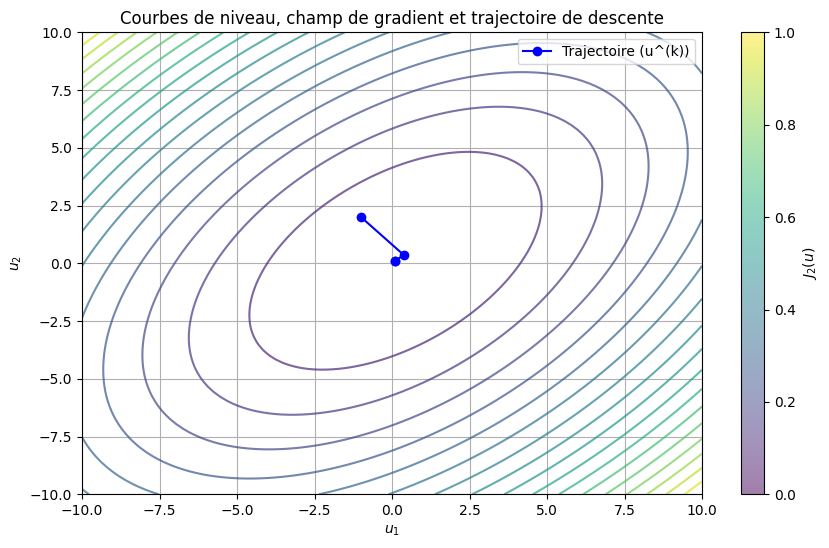

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
h = 1 / 3  # h pour n=2
A = 1/(h**2) * np.array([[2, -1], [-1, 2]]) # Matrice A
b = np.array([1, 1]) 
u0 = np.transpose(np.array([-1,2])) 

def J2(u):
    return 0.5 * np.dot(u.T, np.dot(A , u)) - np.dot(b, u) 

def grad_J2(u,A,b):
    return np.dot(A,u) - b
def gradient_conjugue(u0):
    max_iteration = 1000
    k = 0
    r = Tol = 10**(-6)
    u = u0.copy()
    grad = grad_J2(u,A,b)
    direction  = -grad
    trajectory = [u.copy()]
    while r >= Tol and k <= max_iteration:
        rho = -np.dot(grad,direction)/(np.dot(np.dot(A,direction),direction))
        u_next = u + rho*direction
        beta = np.linalg.norm(grad_J2(u_next,A,b))**2/np.linalg.norm(grad)**2
        grad = grad_J2(u_next,A,b)
        direction = -grad + beta*direction
        trajectory.append(u_next.copy())
        r= np.linalg.norm(u_next-u)
        print (f'U_min = {u_next} , r = {r} , Max_iteration = {k} , rho = {rho}' )
        u = u_next
        k += 1
    return np.array(trajectory)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
U1, U2 = np.meshgrid(x, y)

# Calculer les valeurs de J2 pour chaque point de la grille
Z = np.zeros_like(U1)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        Z[i, j] = J2(u)
# Calculer les gradients pour la grille
grad_U1, grad_U2 = np.zeros_like(U1), np.zeros_like(U2)
for i in range(U1.shape[0]):
    for j in range(U1.shape[1]):
        u = np.array([U1[i, j], U2[i, j]])
        grad = grad_J2(u,A,b)
        grad_U1[i, j], grad_U2[i, j] = grad[0], grad[1]

trajectory = gradient_conjugue(u0)

# Tracer les courbes de niveau
plt.figure(figsize=(10, 6))
plt.contour(U1, U2, Z, levels=20, cmap='viridis', alpha=0.7)
plt.quiver(U1, U2, grad_U1, grad_U2, color="white", scale=200, alpha=0.5)

# Trajectoire
trajectory_u1, trajectory_u2 = trajectory[:, 0], trajectory[:, 1]
plt.plot(trajectory_u1[:], trajectory_u2[:], marker='o', color='blue', label="Trajectoire (u^(k))")

plt.title("Courbes de niveau, champ de gradient et trajectoire de descente")
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")
plt.colorbar(label="$J_2(u)$")
plt.legend()
plt.grid()
plt.show()

In [17]:
def matrice_A(n, h):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2 / h**2
        if i > 0:
            A[i, i - 1] = -1 / h**2
        if i < n - 1:
            A[i, i + 1] = -1 / h**2
    return A

for n in [10,20,50,100]:
    h = 1/(n+1)
    A = matrice_A(n,h)
    









x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

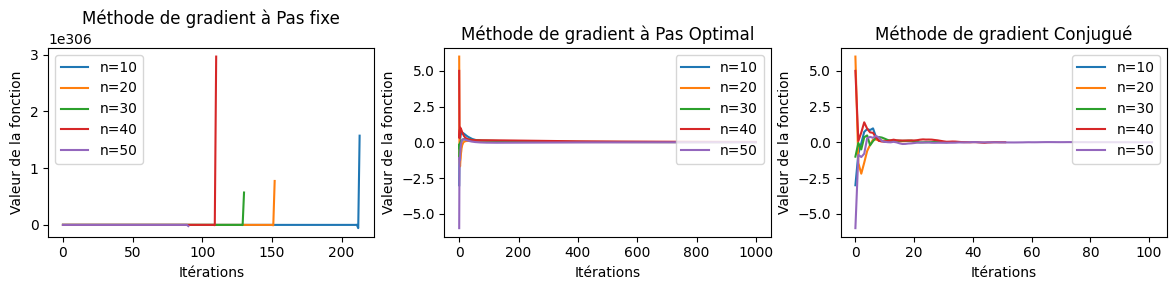

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import random

# Fonction pour créer la matrice A
def matrice_A(n, h):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2 / h**2
        if i > 0:
            A[i, i - 1] = -1 / h**2
        if i < n - 1:
            A[i, i + 1] = -1 / h**2
    return A

# Gradient de la fonction J2
def grad_J2(u, A, b):
    return np.dot(A, u) - b

# Fonction de la section dorée
def section_dorée(u, direction, a, b, A, b_vect):
    err = b - a 
    Tol = 10**-6
    phi = (1 + sqrt(5)) / 2
    k = 0
    while err >= Tol:
        a_next = a + (b - a) / (phi**2)
        b_next = a + (b - a) / phi
        
        J2_a_next = np.linalg.norm(np.dot(A, u + a_next * direction) - b_vect)**2
        J2_b_next = np.linalg.norm(np.dot(A, u + b_next * direction) - b_vect)**2
        
        if J2_a_next > J2_b_next:
            a = a_next
        else:
            b = b_next
        
        k += 1
        err = b - a
    
    return (a + b) / 2

# Gradient à pas optimal
def gradient_optimale(u0, A, b):
    max_iteration = 1000
    Tol = 10**(-6)
    u = u0.copy()
    trajectory = [u.copy()]
    
    for k in range(max_iteration):
        grad = grad_J2(u, A, b)
        direction = -grad
        a = 0
        bb = 1
        
        rho = section_dorée(u, direction, a, bb, A, b)
        u_next = u + rho * direction
        trajectory.append(u_next.copy())
        
        r = np.linalg.norm(u_next - u)
        if r < Tol:
            break
        
        u = u_next
    
    return np.array(trajectory)

# Gradient à pas fixe
def gradient_fixe(rho, u0, A, b):
    max_iter = 1000
    Tol = 10**(-6)
    u = u0.copy()
    trajectory = [u.copy()]
    
    for k in range(max_iter):
        grad = grad_J2(u, A, b)
        direction = -grad
        u_next = u + rho * direction
        trajectory.append(u_next.copy())
        
        r = np.linalg.norm(u_next - u)
        if r < Tol:
            break
        
        u = u_next
    
    return np.array(trajectory)

# Gradient conjugué
def gradient_conjugue(u0, A, b):
    max_iteration = 1000
    Tol = 10**(-6)
    u = u0.copy()
    grad = grad_J2(u, A, b)
    direction = -grad
    trajectory = [u.copy()]
    r = np.linalg.norm(grad)
    
    for k in range(max_iteration):
        rho = -np.dot(grad, direction) / np.dot(np.dot(A, direction), direction)
        u_next = u + rho * direction
        
        beta = np.linalg.norm(grad_J2(u_next, A, b))**2 / np.linalg.norm(grad)**2
        grad = grad_J2(u_next, A, b)
        direction = -grad + beta * direction
        
        trajectory.append(u_next.copy())
        
        r = np.linalg.norm(u_next - u)
        if r < Tol:
            break
        
        u = u_next
    
    return np.array(trajectory)

# Test pour différentes tailles de n
trajectoires_fixe = []
trajectoires_optimale = []
trajectoires_conjugue = []

for n in [10, 20, 30, 50, 100]:
    h = 1 / (n + 1)
    A = matrice_A(n, h)
    b = np.ones(n)  # Exemple de vecteur b, ajustez selon votre problème
    u0 = [random.randint(-10, 10) for _ in range(n)]  # Initialisation aléatoire
    
    trajectoires_fixe.append(gradient_fixe(0.06, u0, A, b))  # Choix de rho = 0.06
    trajectoires_optimale.append(gradient_optimale(u0, A, b))
    trajectoires_conjugue.append(gradient_conjugue(u0, A, b))
# Affichage des résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Méthode de gradient à pas fixe
for i, trajectoire in enumerate(trajectoires_fixe):
    iterations_fixe = np.arange(len(trajectoire))  # Nombre d'itérations réel
    axes[0].plot(iterations_fixe, trajectoire[:, 0], label=f"n={10*(i+1)}")
axes[0].set_title("Méthode de gradient à Pas fixe")
axes[0].set_xlabel("Itérations")
axes[0].set_ylabel("Valeur de la fonction")
axes[0].legend()

# Méthode de gradient à pas optimal
for i, trajectoire in enumerate(trajectoires_optimale):
    iterations_optimale = np.arange(len(trajectoire))  # Nombre d'itérations réel
    axes[1].plot(iterations_optimale, trajectoire[:, 0], label=f"n={10*(i+1)}")
axes[1].set_title("Méthode de gradient à Pas Optimal")
axes[1].set_xlabel("Itérations")
axes[1].set_ylabel("Valeur de la fonction")
axes[1].legend()

# Méthode de gradient conjugué
for i, trajectoire in enumerate(trajectoires_conjugue):
    iterations_conjugue = np.arange(len(trajectoire))  # Nombre d'itérations réel
    axes[2].plot(iterations_conjugue, trajectoire[:, 0], label=f"n={10*(i+1)}")
axes[2].set_title("Méthode de gradient Conjugué")
axes[2].set_xlabel("Itérations")
axes[2].set_ylabel("Valeur de la fonction")
axes[2].legend()

plt.tight_layout()
plt.show()


C:\Users\21625\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\linalg\_linalg.py:2832: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
C:\Users\21625\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\linalg\_linalg.py:2833: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


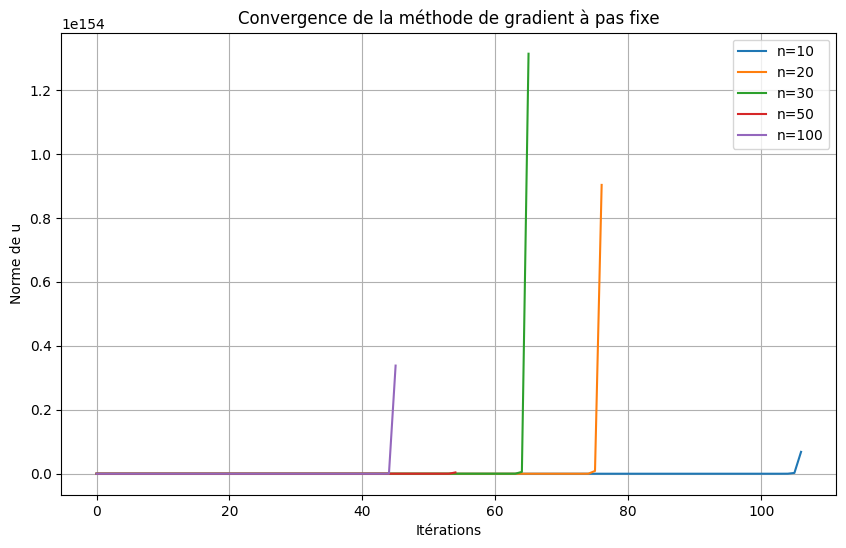

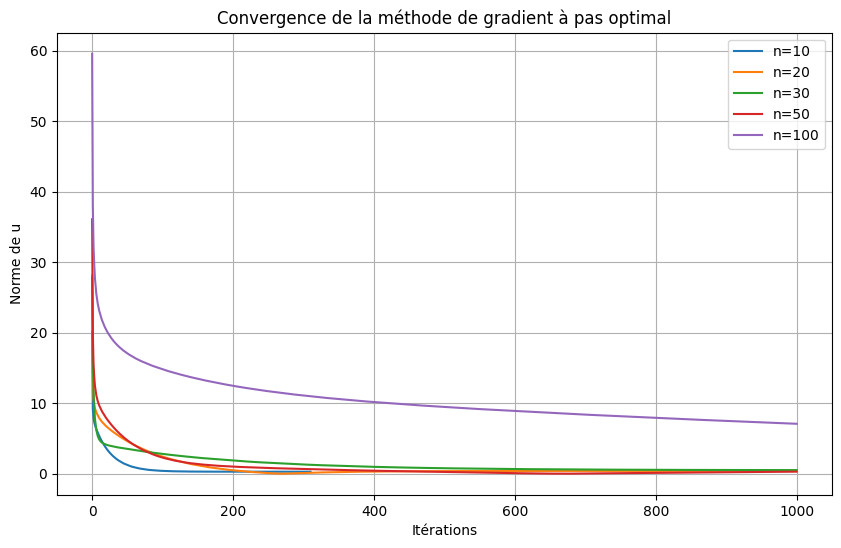

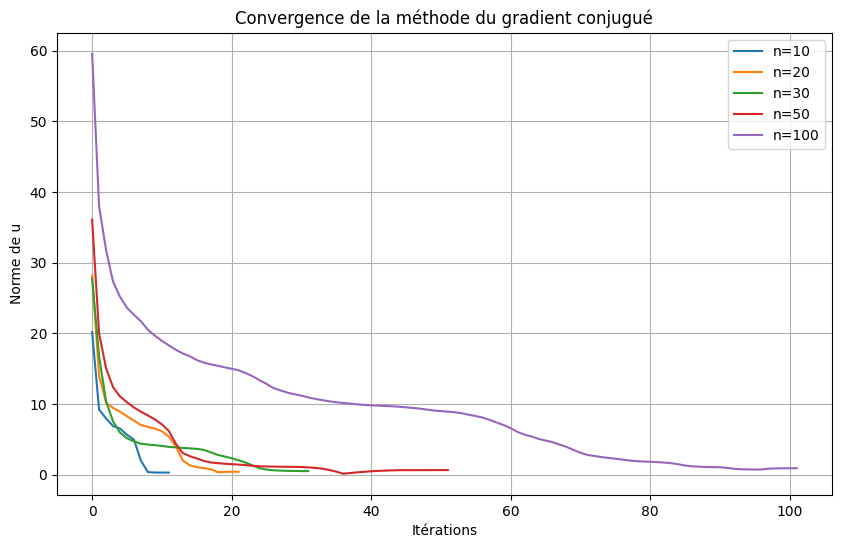

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import random
import time

# Fonction pour créer la matrice A
def matrice_A(n, h):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2 / h**2
        if i > 0:
            A[i, i - 1] = -1 / h**2
        if i < n - 1:
            A[i, i + 1] = -1 / h**2
    return A

# Gradient de la fonction J2
def grad_J2(u, A, b):
    return np.dot(A, u) - b

# Fonction de la section dorée pour minimiser J2 dans une direction donnée
def section_dorée(u, direction, a, b, A, b_vect):
    err = b - a
    Tol = 10**-6
    phi = (1 + sqrt(5)) / 2  # Ratio d'or
    while err >= Tol:
        a_next = a + (b - a) / (phi**2)
        b_next = a + (b - a) / phi
        
        # Calcul de J2 pour deux points
        J2_a_next = 0.5 * np.dot((u + a_next * direction).T, np.dot(A, u + a_next * direction)) - np.dot(b_vect, u + a_next * direction)
        J2_b_next = 0.5 * np.dot((u + b_next * direction).T, np.dot(A, u + b_next * direction)) - np.dot(b_vect, u + b_next * direction)
        
        if J2_a_next > J2_b_next:
            a = a_next
        else:
            b = b_next
        
        err = b - a
    
    return (a + b) / 2

# Gradient à pas optimal
def gradient_optimale(u0, A, b):
    max_iteration = 1000
    Tol = 10**-6
    u = u0.copy()
    trajectory = [u.copy()]
    
    for k in range(max_iteration):
        grad = grad_J2(u, A, b)
        direction = -grad
        a, bb = 0, 1  # Intervalle initial pour section dorée
        
        # Trouver le pas optimal
        rho = section_dorée(u, direction, a, bb, A, b)
        u_next = u + rho * direction
        trajectory.append(u_next.copy())
        
        if np.linalg.norm(u_next - u) < Tol:
            break
        
        u = u_next
    
    return np.array(trajectory)

# Gradient à pas fixe
def gradient_fixe(rho, u0, A, b):
    max_iter = 1000
    Tol = 10**-6
    u = u0.copy()
    trajectory = [u.copy()]
    
    for k in range(max_iter):
        grad = grad_J2(u, A, b)
        direction = -grad
        u_next = u + rho * direction
        trajectory.append(u_next.copy())
        
        if np.linalg.norm(u_next - u) < Tol:
            break
        
        u = u_next
    
    return np.array(trajectory)

# Gradient conjugué
def gradient_conjugue(u0, A, b):
    max_iteration = 1000
    Tol = 10**-6
    u = u0.copy()
    grad = grad_J2(u, A, b)
    direction = -grad
    trajectory = [u.copy()]
    
    for k in range(max_iteration):
        rho = -np.dot(grad, direction) / np.dot(np.dot(A, direction), direction)
        u_next = u + rho * direction
        
        grad_next = grad_J2(u_next, A, b)
        beta = np.linalg.norm(grad_next)**2 / np.linalg.norm(grad)**2
        direction = -grad_next + beta * direction
        grad = grad_next
        
        trajectory.append(u_next.copy())
        
        if np.linalg.norm(u_next - u) < Tol:
            break
        
        u = u_next
    
    return np.array(trajectory)

# Comparaison des méthodes pour différentes tailles de n
sizes = [10, 20, 30, 50, 100]
trajectoires_fixe = []
trajectoires_optimale = []
trajectoires_conjugue = []

for n in sizes:
    h = 1 / (n + 1)
    A = matrice_A(n, h)
    b = np.ones(n)
    u0 = np.random.uniform(-10, 10, n)  # Initialisation aléatoire

    # Méthode à pas fixe
    traj_fixe = gradient_fixe(0.06, u0, A, b)
    trajectoires_fixe.append(traj_fixe)

    # Méthode à pas optimal
    traj_optimale = gradient_optimale(u0, A, b)
    trajectoires_optimale.append(traj_optimale)

    # Méthode du gradient conjugué
    traj_conjugue = gradient_conjugue(u0, A, b)
    trajectoires_conjugue.append(traj_conjugue)

# Tracer les résultats séparément
# Méthode à pas fixe
plt.figure(figsize=(10, 6))
for i, trajectoire in enumerate(trajectoires_fixe):
    iterations = np.arange(len(trajectoire))
    plt.plot(iterations, np.linalg.norm(trajectoire, axis=1), label=f"n={sizes[i]}")
plt.title("Convergence de la méthode de gradient à pas fixe")
plt.xlabel("Itérations")
plt.ylabel("Norme de u")
plt.legend()
plt.grid()
plt.show()

# Méthode à pas optimal
plt.figure(figsize=(10, 6))
for i, trajectoire in enumerate(trajectoires_optimale):
    iterations = np.arange(len(trajectoire))
    plt.plot(iterations, np.linalg.norm(trajectoire, axis=1), label=f"n={sizes[i]}")
plt.title("Convergence de la méthode de gradient à pas optimal")
plt.xlabel("Itérations")
plt.ylabel("Norme de u")
plt.legend()
plt.grid()
plt.show()

# Méthode du gradient conjugué
plt.figure(figsize=(10, 6))
for i, trajectoire in enumerate(trajectoires_conjugue):
    iterations = np.arange(len(trajectoire))
    plt.plot(iterations, np.linalg.norm(trajectoire, axis=1), label=f"n={sizes[i]}")
plt.title("Convergence de la méthode du gradient conjugué")
plt.xlabel("Itérations")
plt.ylabel("Norme de u")
plt.legend()
plt.grid()
plt.show()

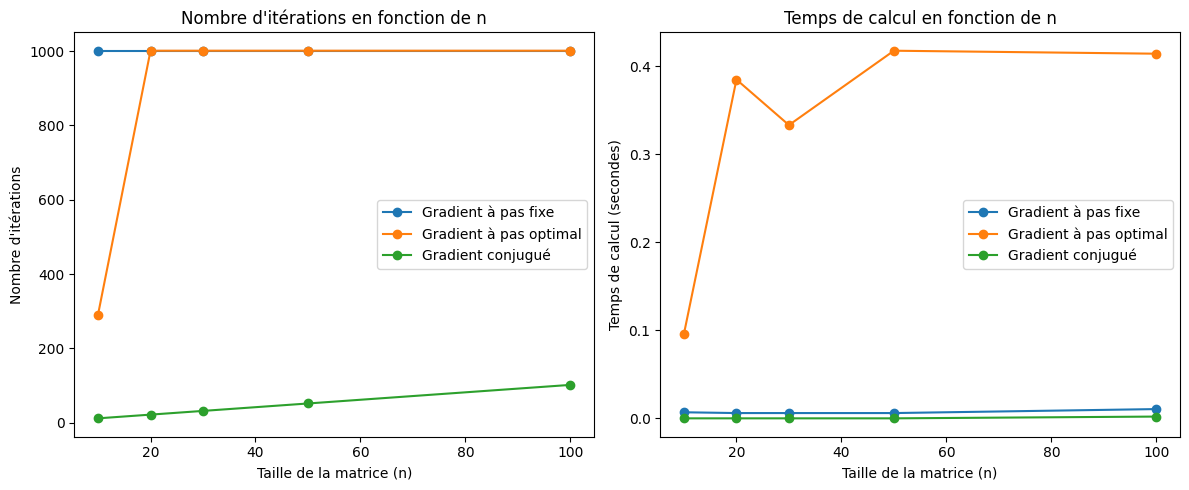

     n  Itérations (Pas fixe)  Temps (Pas fixe)  Itérations (Pas optimal)  \
0   10                   1001          0.006887                       291   
1   20                   1001          0.005994                      1001   
2   30                   1001          0.006001                      1001   
3   50                   1001          0.005992                      1001   
4  100                   1001          0.010513                      1001   

   Temps (Pas optimal)  Itérations (Conjugué)  Temps (Conjugué)  
0             0.096057                     12           0.00000  
1             0.384689                     22           0.00000  
2             0.332986                     32           0.00000  
3             0.417435                     52           0.00000  
4             0.414044                    102           0.00201  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Fonction pour mesurer le temps et les itérations
def evaluate_methods(n_values, rho):
    iterations = {'fixe': [], 'optimal': [], 'conjugue': []}
    times = {'fixe': [], 'optimal': [], 'conjugue': []}
    
    for n in n_values:
        h = 1 / (n + 1)
        A = matrice_A(n, h)
        b = np.ones(n)
        u0 = np.random.uniform(-10, 10, size=n)

        # Méthode à pas fixe
        start_time = time.time()
        traj_fixe = gradient_fixe(rho, u0, A, b)
        end_time = time.time()
        iterations['fixe'].append(len(traj_fixe))
        times['fixe'].append(end_time - start_time)
        
        # Méthode à pas optimal
        start_time = time.time()
        traj_optimal = gradient_optimale(u0, A, b)
        end_time = time.time()
        iterations['optimal'].append(len(traj_optimal))
        times['optimal'].append(end_time - start_time)
        
        # Méthode du gradient conjugué
        start_time = time.time()
        traj_conjugue = gradient_conjugue(u0, A, b)
        end_time = time.time()
        iterations['conjugue'].append(len(traj_conjugue))
        times['conjugue'].append(end_time - start_time)
    
    return iterations, times

# Évaluer pour différentes valeurs de n
n_values = [10, 20, 30, 50, 100]
rho = 0.1
iterations, times = evaluate_methods(n_values, rho)

# Tracer les résultats
plt.figure(figsize=(12, 5))

# Nombre d'itérations
plt.subplot(1, 2, 1)
plt.plot(n_values, iterations['fixe'], label='Gradient à pas fixe', marker='o')
plt.plot(n_values, iterations['optimal'], label='Gradient à pas optimal', marker='o')
plt.plot(n_values, iterations['conjugue'], label='Gradient conjugué', marker='o')
plt.title("Nombre d'itérations en fonction de n")
plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Nombre d'itérations")
plt.legend()

# Temps de calcul
plt.subplot(1, 2, 2)
plt.plot(n_values, times['fixe'], label='Gradient à pas fixe', marker='o')
plt.plot(n_values, times['optimal'], label='Gradient à pas optimal', marker='o')
plt.plot(n_values, times['conjugue'], label='Gradient conjugué', marker='o')
plt.title("Temps de calcul en fonction de n")
plt.xlabel("Taille de la matrice (n)")
plt.ylabel("Temps de calcul (secondes)")
plt.legend()

plt.tight_layout()
plt.show()

# Affichage sous forme de tableau
import pandas as pd

data = {
    'n': n_values,
    'Itérations (Pas fixe)': iterations['fixe'],
    'Temps (Pas fixe)': times['fixe'],
    'Itérations (Pas optimal)': iterations['optimal'],
    'Temps (Pas optimal)': times['optimal'],
    'Itérations (Conjugué)': iterations['conjugue'],
    'Temps (Conjugué)': times['conjugue']
}

df = pd.DataFrame(data)
print(df)
